In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':"VOO's Stock price"}, xlabel='Date'>

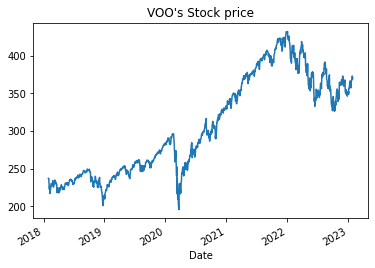

In [4]:
#Plotting Apple's Price over 5 years
ticker = yf.Ticker('VOO')
voo = yf.download('VOO')
voo_df = ticker.history(period="5y")
voo_df['Close'].plot(title="VOO's Stock price")

In [5]:
voo_df = ticker.history(period="60d")
voo_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-11-02 00:00:00-04:00,351.098598,355.427871,342.768495,342.858063,5022500,0.0,0.0,0.0
2022-11-03 00:00:00-04:00,339.713145,342.171374,337.284772,339.205566,4534800,0.0,0.0,0.0
2022-11-04 00:00:00-04:00,344.758968,346.361280,338.379515,344.171783,3655400,0.0,0.0,0.0
2022-11-07 00:00:00-05:00,345.405879,348.043243,343.455229,347.475983,3316600,0.0,0.0,0.0
2022-11-08 00:00:00-05:00,348.540852,352.183411,345.425765,349.366913,3237200,0.0,0.0,0.0


In [6]:

y = voo_df["Close"]
x = voo_df.drop( labels=["Close"], axis = 1, inplace=False)

#

#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

#creating the model and fitting it to the data
regressor = LinearRegression()
regressor.fit(x_train, y_train)


#predicting the value of Apple's stock
voo_stock_prediction = regressor.predict(x_test)

#printing the result
print(voo_stock_prediction)
print(regressor.coef_)
print(y_test)


[350.48310927 345.04846031 350.78967565 359.79101703 360.28023516
 369.16080296]
[-7.25654140e-01  1.12498752e+00  5.62666825e-01 -1.50039725e-07
 -2.61508273e-01  0.00000000e+00  0.00000000e+00]
Date
2022-11-02 00:00:00-04:00    342.858063
2022-11-09 00:00:00-05:00    342.231079
2022-12-23 00:00:00-05:00    351.869995
2023-01-09 00:00:00-05:00    356.329987
2022-11-21 00:00:00-05:00    360.981262
2023-01-23 00:00:00-05:00    368.140015
Name: Close, dtype: float64


In [7]:
#Root-Mean-Squared error
rmse = math.sqrt(mean_squared_error(y_test,voo_stock_prediction))
if regressor.coef_[1]>0:
    print("It is a good Idea to buy apple now")
else:
    print("It is currently not a good idea to buy apple")

print(rmse)



It is a good Idea to buy apple now
3.6687473135868705
